# ✨ Apresentação

 Curso : Machine Learning


 Alunas: Camila Perazzo

Implementação de modelos e verificação de eficiência da estratégia adotada com redes neurais e busca de parâmetros por grid search/random search - 19/06/2023.

# 💡 Questões

**Você pode utilizar as bibliotecas matplotlib ou outras ferramentas de visualização para analisar os resultados e apresentar gráficos informativos.**

### Passos a seguir:

1. Faça as seguintes importações:

  (a) Dataset Breast Cancer a partir da biblioteca sklearn;

  (b) O classificador MLPClassifier a partir da biblioteca sklearn.neural_network;

  (c) O método GridSearchCV a partir da biblioteca sklearn.model_selection.

2. Crie o modelo do classificador, criando a rede MPL através da função MLPClassifier e defina um valor para o
parâmetro max_iter.
3. Crie o mapa de buscas utilizando o conceito de dicionários, conforme o trecho de código a seguir:

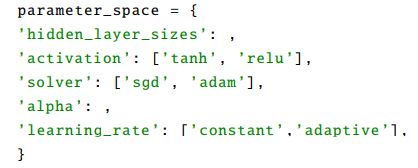

  * Para tal fim, **teste dois** valores diferentes para o hiperparâmetro alpha e **duas estruturas** diferentes de redes para o parâmetro hiddel_layer_sizes, que define o número de camadas ocultas e o número de neurônios.


4. Utilize a função GridSearchCV para realizar a busca considere os parâmetros n_jobs e cv iguais a 1 e 5, respectivamente.

5. Verifique os melhores hiperparâmetros encontrados no modelo através do método best_params_.

6. Utilize a função classification_report da biblioteca sklearn para verificar a eficiência do modelo em termos
das métricas de avaliação de classificação.

# 🎲 Execução da Atividade

In [ ]:
# Passo 1: Importar bibliotecas e carregar o conjunto de dados

from sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

data = load_breast_cancer()
X = data.data
y = data.target

In [ ]:
# Passo 2: Criar o modelo do classificador MLP

classifier = MLPClassifier(max_iter=100)


In [ ]:
# Passo 3: Definir o mapa de busca

parameter_space = {
    'hidden_layer_sizes': [(10,), (20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

In [ ]:
# Passo 4: Realizar a busca em grade

grid_search = GridSearchCV(classifier, parameter_space, n_jobs=1, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(10,), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [ ]:
# Passo 5: Verificar os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
print("Melhores hiperparâmetros encontrados:", best_params)

Melhores hiperparâmetros encontrados: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [ ]:
# Passo 6: Avaliar o modelo utilizando classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_classifier = MLPClassifier(max_iter=100, **best_params)
best_classifier.fit(X_train, y_train)
y_pred = best_classifier.predict(X_test)
report = classification_report(y_test, y_pred)

print("Relatório de classificação:")
print(report)

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.94      0.94      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

